# Tomato Leaf Detection using VGG19 model
## Very Deep Convolutional Networks for Large-Scale Image Recognition

# Importing all the requirements

In [1]:
import numpy as np
import pandas as pd
import os

# Creating the path

In [2]:
train_path='./train/'
print(os.listdir(train_path))
print("*"*100)
valid_path='./valid/'
print(os.listdir(valid_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
****************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [3]:
folder=(os.listdir(train_path))
folder

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Represting the Tomatos

<ul>
    <li><h3>ty : being the type of disease</h3></li>
    <li><h3>index : being the image in the data sets.</h3></li>
</ul>

Text(0.5, 1.0, 'Tomato___healthy')

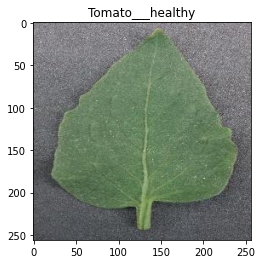

In [22]:
ty=2
index=25
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_path+folder[ty]+"/"+(os.listdir(train_path+folder[ty])[index])))
plt.title(folder[ty])

# Importing packages

In [5]:
from tensorflow.keras.layers import Lambda, Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [6]:
size=[128,128]
vgg19=VGG19(input_shape=size+[3],weights='imagenet',include_top=False)

# Freezing the rest of the layers

In [7]:
for layer in vgg19.layers:
    layer.trainable=False

## Creating the top layer for my desired prediction

In [8]:
x=Flatten()(vgg19.output)
prediction=Dense(len(folder),activation='softmax')(x)

model_vgg=Model(inputs=vgg19.input,outputs=prediction)

# Model Summary

In [9]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

# Compiling the model

In [ ]:
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=7, 
            verbose=0,
            mode='min')

In [10]:
model_vgg.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'], callbacks=[plateau])

# Data Augmentation

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
train_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=True)
valid_set=valid_datagen.flow_from_directory(valid_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=False)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [13]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

history=model_vgg.fit(train_set,
                validation_data=valid_set,
                epochs=9,
                callbacks=[tb_callback]
                )

Epoch 1/9
1147/1147 [==============================] - 260s 217ms/step - loss: 0.7685 - accuracy: 0.7404 - val_loss: 0.6265 - val_accuracy: 0.7863
Epoch 2/9
1147/1147 [==============================] - 109s 95ms/step - loss: 0.4362 - accuracy: 0.8533 - val_loss: 0.4141 - val_accuracy: 0.8587
Epoch 3/9
1147/1147 [==============================] - 119s 104ms/step - loss: 0.3411 - accuracy: 0.8851 - val_loss: 0.4177 - val_accuracy: 0.8600
Epoch 4/9
1147/1147 [==============================] - 115s 100ms/step - loss: 0.2730 - accuracy: 0.9088 - val_loss: 0.4617 - val_accuracy: 0.8412
Epoch 5/9
1147/1147 [==============================] - 123s 107ms/step - loss: 0.2334 - accuracy: 0.9209 - val_loss: 0.4881 - val_accuracy: 0.8379
Epoch 6/9
1147/1147 [==============================] - 123s 107ms/step - loss: 0.2016 - accuracy: 0.9334 - val_loss: 0.4312 - val_accuracy: 0.8598
Epoch 7/9
1147/1147 [==============================] - 125s 109ms/step - loss: 0.1719 - accuracy: 0.9423 - val_loss: 0.

# Visualizing the Fitting of the model

Text(0.5, 1.0, 'Training and validation loss')

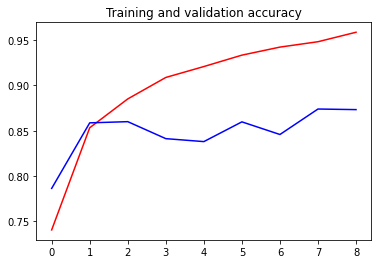

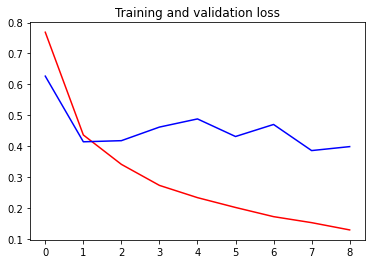

In [14]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', )
plt.plot(epochs, val_acc, 'b', )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', )
plt.plot(epochs, val_loss, 'b', )


plt.title('Training and validation loss')

# Predicting the model

### %Load_ext tensorboard
### %tensorboard --Logdir Logs/fit

In [15]:
y_pred=model_vgg.predict(valid_set)

# saving the model

In [16]:
model_vgg.save('model_vgg19.h5')

# Checking the prediction of the model

In [17]:
import cv2
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
    img_array=img_array/255
    new_array=cv2.resize(img_array,(128,128))
    return new_array.reshape(-1,128,128,3)

In [18]:
class_dict=train_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [19]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction)==clss:
            return key


In [34]:
ty=9
index=6
#import matplotlib.pyplot as plt
print(folder[ty])
pred=model_vgg.predict([prepare(valid_path+folder[ty]+"/"+(os.listdir(valid_path+folder[ty])[index]))])
prediction_cls(pred)
#plt.title(folder[ty])

Tomato___Tomato_Yellow_Leaf_Curl_Virus


'Tomato___Tomato_Yellow_Leaf_Curl_Virus'